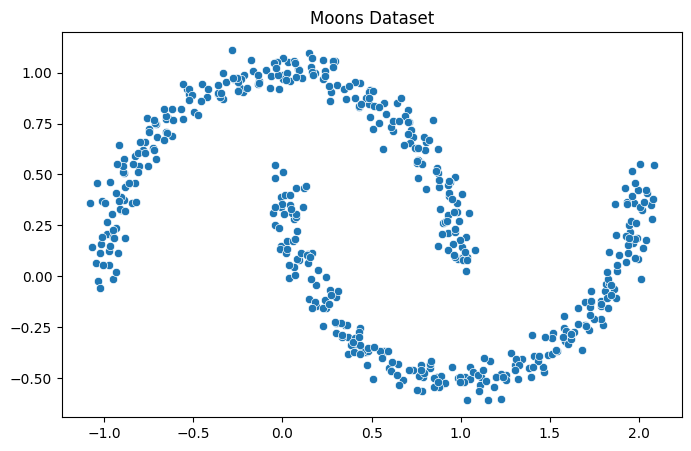

In [56]:
# Import necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the moon dataset with noise
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.title('Moons Dataset')
plt.show()

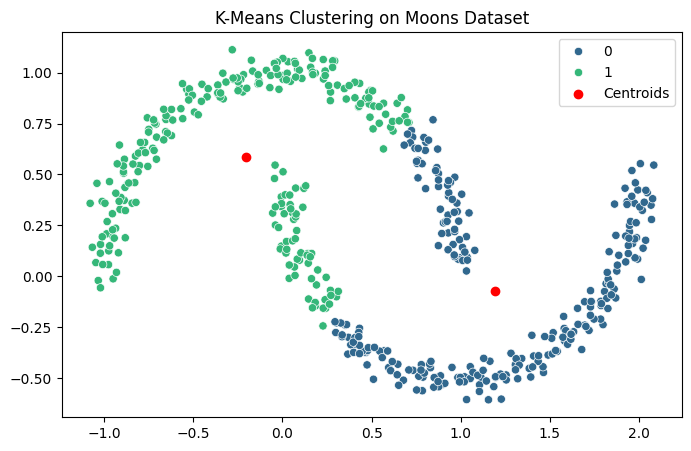

In [57]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the cluster labels
labels_kmeans = kmeans.predict(X)

# Visualize the K-Means clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_kmeans, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', label='Centroids')
plt.title('K-Means Clustering on Moons Dataset')
plt.legend()
plt.show()

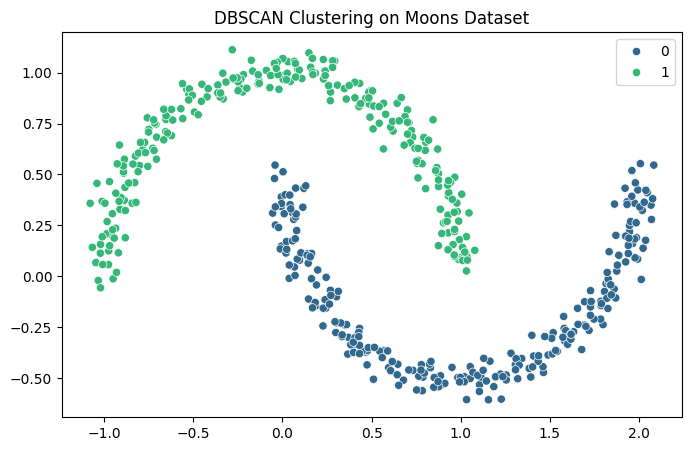

In [58]:
# Import necessary libraries
from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=9)

# Fit the model and predict the cluster labels
labels_dbscan = dbscan.fit_predict(X)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_dbscan, palette='viridis')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.show()

In [59]:
np.random.randn(1)

array([-0.10605709])

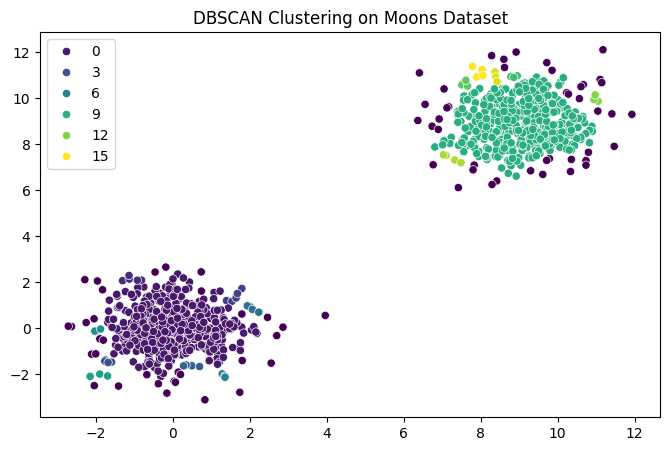

In [61]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
import numpy as np

X=np.random.randn(1000, 2)
X[500:] += 9

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=3)
# Fit the model and predict the cluster labels
labels_dbscan = dbscan.fit_predict(X)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_dbscan, palette='viridis')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 122


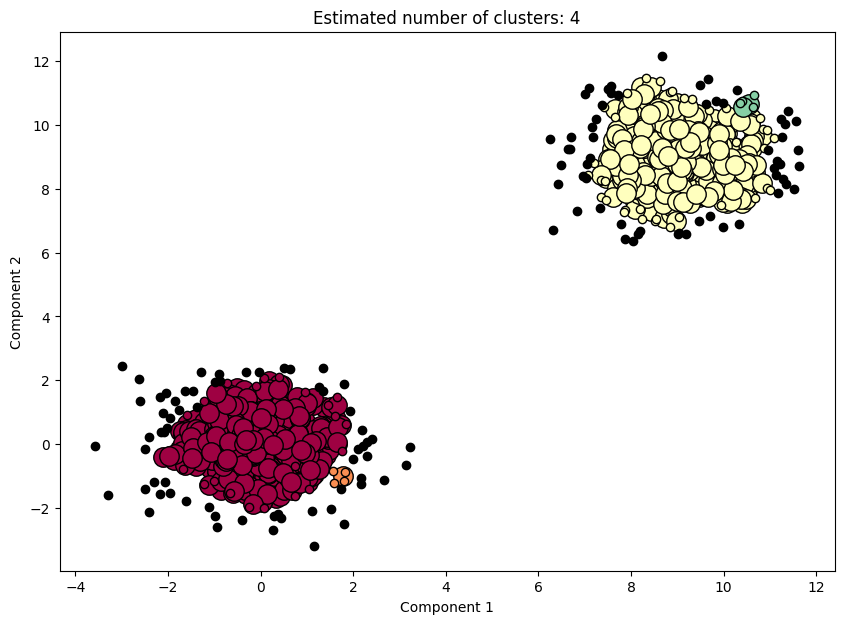

In [48]:
from sklearn.cluster import DBSCAN

X=np.random.randn(1000, 2)
X[500:] += 9

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit and predict the labels
labels = dbscan.fit_predict(X)

# Identify the core and outlier samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Get the number of clusters (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Plot the data, color code by DBSCAN cluster assignment
plt.figure(figsize=(10,7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()